## Central Limit Theorem

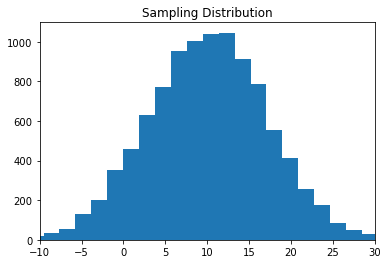

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import random

'''
We can use the random.normal() function from NumPy to generate a population of 
values with a particular standard deviation (pop_stdev) and mean (arbitrarily set 
to 10 in this example). 
We can then

- take random samples of some size (samp_size) from the population
- record the sample mean for each one
- plot a histogram of the sample means
'''

### try changing samp_size and pop_stdev and re-running the code
# try values of samp_size between 2 and 20
# try values of pop_stdev between 1 and 10
samp_size = 2
pop_stdev = 10

# population is a list containing the wages of each individual in the population
population = np.random.normal(loc = 10, scale = pop_stdev, size = 100000)
population = list(population)

sample_means = []
 
for i in range(10000):
    # take a random sample of samp_size wages from the population
    samp = random.sample(population, samp_size)
    # store the sample mean in a list called sample_means
    sample_means.append(np.mean(samp))

# Inspect the means by plotting a histogram
plt.hist(sample_means, bins = 30)
plt.title('Sampling Distribution')
plt.vlines(np.mean(sample_means), 0, 1000, lw=3, linestyles='dashed')
# plt.xlim(-10, 30)

plt.show()

In [8]:
print('The NumPy percentile() function can be used to calculate that 95% of the sample means from the above')
print('simulation fall in a range from 16.14 to 21.87 dollars per hour (plus or minus around 2.87 dollars')
print('from the mean):')
percentiles = np.percentile(sample_means, [2.5, 97.5])
print(percentiles)

The NumPy percentile() function can be used to calculate that 95% of the sample means from the above
simulation fall in a range from 16.14 to 21.87 dollars per hour (plus or minus around 2.87 dollars
from the mean):
[-3.83106063 23.81974729]


## Formally defining the CLT
It’s now time to formally define the CLT, which tells us that the sampling distribution of the mean:

- is normally distributed (for large enough sample size)
- is centered at the population mean
- has standard deviation equal to the population standard deviation divided by the square root of the sample size. This is called Standard Error.
With respect to the standard error formula described above, note that there are two levers on the width of the sampling distribution:

#### The population standard deviation. 
Populations with more variation will yield sample means with more variation. For example, imagine sampling the heights of 5 year olds compared to sampling heights of 5-18 year olds. There is more variation in the heights of 5-18 year olds, so there will be more variation in individual samples.

#### The sample size. 
The larger the sample size, the smaller the variation in repeated sample means. In the wage example above, imagine sampling only five people instead of 150. Those five sampled people could include one outlier that throws the whole sample mean off. If we sample 150 (or even more) people, we’re more likely to have high and low outliers that cancel each other out.

## How does this help the data scientist?
In real life, the data scientist is still stuck with their one sample mean as a best guess for the population mean. However, they can leverage the CLT to estimate the standard error — the amount of variation in imagined, repeated samples!

Remember that the CLT tells us that the standard error (SE) can be calculated as follows:

\begin{equation*}
SE = \frac{PopulationStandardDeviation}{\sqrt{SampleSize}}
\end{equation*}

While a researcher or data scientist probably does not know the population standard deviation, they can use the standard deviation of their sample to estimate it.

Let’s return to the data scientist who collected a single sample of 150 wages and calculated an average wage of 17.74 dollars. To quantify the uncertainty around this sample mean, this data scientist can first estimate the standard error:

```python
std_error = np.std(my_sample)/(150 ** 0.5)
print(std_error)
# output: 1.275
```
Then, leveraging the part of the CLT that says the sampling distribution is normally distributed, our data scientist can use a nifty property of normal distributions: 95% of normally distributed values are within about 1.96 standard deviations of the mean. This allows the data scientist to estimate the width of the sampling distribution above, without actually knowing the population distribution!

First, the data scientist needs to multiply 1.275 by the estimated standard error: 1.96 * 1.275 = 2.50. The interpretation of this number is as follows:

Imagine taking a large number of samples of size 150 from a population with the same amount of variation as in the observed sample.
95% of those samples would be within about 2.50 dollars from the true population mean.
Therefore, there is about a 95% probability that the observed sample mean of 17.74 is no more than 2.50 dollars away from the population mean. In other words, there is about a 95% probability that the population mean is between 15.24 and 20.24. This is referred to as a 95% confidence interval.
Note that the estimate of 2.50 is similar to the value of 2.87 that we calculated as all-knowing beings with access to the full population. With only a single sample in hand, the data scientist can express the uncertainty in their sample mean fairly accurately!